___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2023
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Tema: Redes Neuronales para Clasificación</font>

- Las redes neuronales para clasificación toman como salida valores discretos, generalmente valores binarios (0, 1)
- El principal cambio que debemos hacer para clasificación es cambiar la salida de la red neuronal. Se le pone una función de activación no lineal a la salida, generalmente se usa la función Sigmoidal. 
- Como función de costo se usa el Cross Entropy en lugar de la Suma de Residuales
- Si tenemos una salida multiclase, se debe usar la función Softmax en lugar de la sigmoidal

**Entonces... ¿qué pasaría si tengo una red neuronal con sólo una capa, donde la función de activación es sigmoidal? sería lo mismo que aplicar una regresión logística**

Red neuronal con una capa con función de activación sigmoidal = Regresión logística

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://deeplearningmath.org/images/shallow_NN.png" width="450px" height="280px" />



**Ejemplo para salida binaria**

Queremos predecir si una persona va a tener diabetes o no (Outcome)

In [1]:
#Librerías
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'diabetes.csv')

In [3]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Seleccionar datos para train y test
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [6]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
#Construir red neuronal
from keras.models import Sequential
from keras.layers import Dense

# Estructura de la red neuronal
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #se puede cambiar la función de activación
model.add(Dense(1, activation='sigmoid')) #La capa de salida debe ser "sigmoidal" para problemas binomiales (0 y 1)

# Configuración del optimizador
model.compile(loss='binary_crossentropy',#función de costo
              optimizer='sgd',#gradiente descendente
              metrics=['accuracy'])

# Entrenamiento de la red neuronal
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1)

Epoch 1/200
6/6 [==============================] - 1s 5ms/step - loss: 0.7503 - accuracy: 0.4413
Epoch 2/200
6/6 [==============================] - 0s 5ms/step - loss: 0.7381 - accuracy: 0.4544
Epoch 3/200
6/6 [==============================] - 0s 5ms/step - loss: 0.7268 - accuracy: 0.4767
Epoch 4/200
6/6 [==============================] - 0s 5ms/step - loss: 0.7158 - accuracy: 0.4991
Epoch 5/200
6/6 [==============================] - 0s 7ms/step - loss: 0.7054 - accuracy: 0.5251
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 0.6959 - accuracy: 0.5438
Epoch 7/200
6/6 [==============================] - 0s 5ms/step - loss: 0.6869 - accuracy: 0.5549
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 0.6784 - accuracy: 0.5661
Epoch 9/200
6/6 [==============================] - 0s 5ms/step - loss: 0.6701 - accuracy: 0.5866
Epoch 10/200
6/6 [==============================] - 0s 5ms/step - loss: 0.6624 - accuracy: 0.5959
Epoch 11/200
6/6 [===========

6/6 [==============================] - 0s 12ms/step - loss: 0.4809 - accuracy: 0.7747
Epoch 85/200
6/6 [==============================] - 0s 7ms/step - loss: 0.4802 - accuracy: 0.7747
Epoch 86/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4796 - accuracy: 0.7747
Epoch 87/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4789 - accuracy: 0.7747
Epoch 88/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4783 - accuracy: 0.7747
Epoch 89/200
6/6 [==============================] - 0s 4ms/step - loss: 0.4777 - accuracy: 0.7784
Epoch 90/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4771 - accuracy: 0.7765
Epoch 91/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4765 - accuracy: 0.7747
Epoch 92/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4760 - accuracy: 0.7784
Epoch 93/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4754 - accuracy: 0.7784
Epoch 94/200
6/6 [==============

6/6 [==============================] - 0s 5ms/step - loss: 0.4537 - accuracy: 0.7877
Epoch 168/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4535 - accuracy: 0.7877
Epoch 169/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4534 - accuracy: 0.7877
Epoch 170/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4533 - accuracy: 0.7877
Epoch 171/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4531 - accuracy: 0.7877
Epoch 172/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4530 - accuracy: 0.7877
Epoch 173/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4528 - accuracy: 0.7858
Epoch 174/200
6/6 [==============================] - 0s 6ms/step - loss: 0.4527 - accuracy: 0.7840
Epoch 175/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4525 - accuracy: 0.7858
Epoch 176/200
6/6 [==============================] - 0s 5ms/step - loss: 0.4524 - accuracy: 0.7858
Epoch 177/200
6/6 [=====

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

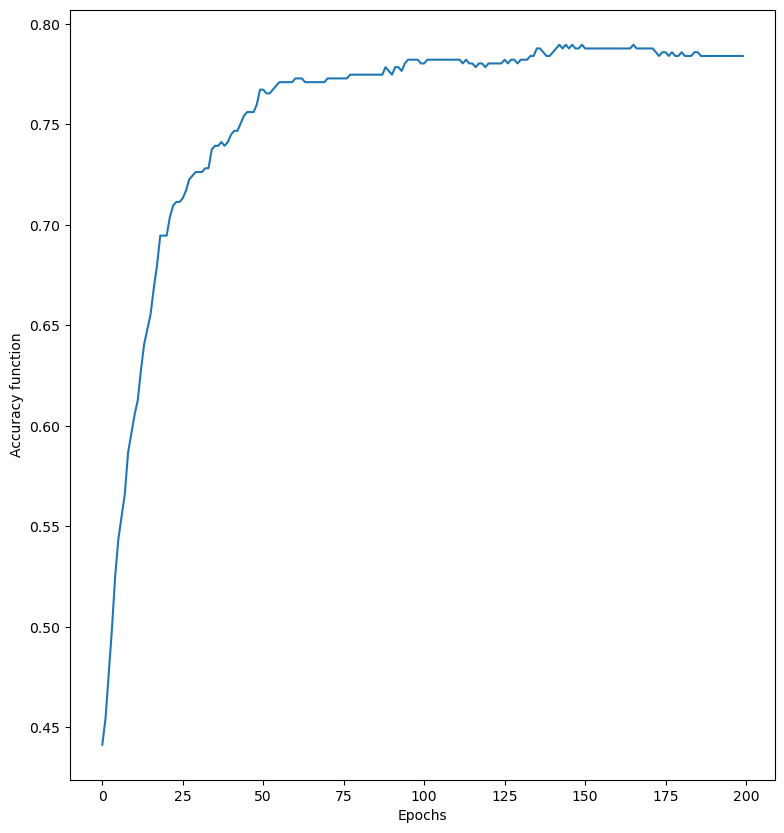

In [9]:
#Ver el performance del modelo en el entrenamiento (accuracy)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')


In [10]:
#Usar el modelo para predecir
Y_pred = model.predict(X_test) #predecir en términos de decimales
Y_prob = (model.predict(X_test) > 0.5).astype("int32") #en términos de 1 y 0

8/8 [==============================] - 0s 3ms/step


In [11]:
Y_pred

array([[0.31366232],
       [0.16229483],
       [0.13642664],
       [0.27618015],
       [0.5610366 ],
       [0.44613454],
       [0.02883269],
       [0.5761216 ],
       [0.62970465],
       [0.7925359 ],
       [0.19498399],
       [0.8981338 ],
       [0.42151335],
       [0.33449495],
       [0.05295125],
       [0.36975595],
       [0.13513839],
       [0.06966984],
       [0.74348336],
       [0.6581921 ],
       [0.19829832],
       [0.08502427],
       [0.4931379 ],
       [0.07496077],
       [0.589964  ],
       [0.8864855 ],
       [0.11026077],
       [0.06888089],
       [0.32291   ],
       [0.11678915],
       [0.75695765],
       [0.8537478 ],
       [0.8458677 ],
       [0.796839  ],
       [0.72378486],
       [0.74899775],
       [0.68321663],
       [0.30336195],
       [0.38611192],
       [0.7654877 ],
       [0.05268931],
       [0.4245471 ],
       [0.5627101 ],
       [0.33002326],
       [0.10037807],
       [0.6006926 ],
       [0.56721634],
       [0.253

In [12]:
Y_prob

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [13]:
#métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score) #mientras más grandes mejor

#métricas en el train
accu_train = accuracy_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
prec_train = precision_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
reca_train = recall_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))

#métricas en el test
accu_test = accuracy_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
prec_test = precision_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
reca_test = recall_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

8/8 [==============================] - 0s 2ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.784 	 0.740 	 0.590
  Test 	 0.745 	 0.640 	 0.600


**Ejemplo Multiclase**

- Aunque las salidas de la red neuronal están limitadas a un rango de valores entre 0 y 1, no se garantiza que la suma de estos sea igual a 1
- Transformar las salidas para que puedan ser usadas como probabilidades ayuda mucho a la interpretabilidad de las predicciones
- Transformación Softmax

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [14]:
#Librerías
import pandas as pd
from sklearn import datasets
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD, Adam
#from tensorflow.keras.optimizers import SGD

In [15]:
#Datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y #tres tipos de flores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [17]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
#creamos la variable target a dummies para poderla trabajar en la red neuronal
dummy_y = to_categorical(Y).astype(int)

In [19]:
dummy_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [20]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [23]:
#Construcción de la red neuronal

# neural network structure
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))#salida

#Gradiente descendente
learning_rate=0.1
epochs = 200
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum)

# configuracion del optimizador
model.compile(loss='binary_crossentropy',#funcion de costo
              optimizer=sgd,#gradiente descendente
              metrics=['accuracy'])



history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))


Epoch 1/200
2/2 [==============================] - 1s 300ms/step - loss: 1.1215 - accuracy: 0.3500 - val_loss: 0.6935 - val_accuracy: 0.3667
Epoch 2/200
2/2 [==============================] - 0s 68ms/step - loss: 0.7086 - accuracy: 0.3250 - val_loss: 0.6835 - val_accuracy: 0.4667
Epoch 3/200
2/2 [==============================] - 0s 68ms/step - loss: 0.6885 - accuracy: 0.4500 - val_loss: 0.7235 - val_accuracy: 0.3000
Epoch 4/200
2/2 [==============================] - 0s 57ms/step - loss: 0.7063 - accuracy: 0.2917 - val_loss: 0.6744 - val_accuracy: 0.5000
Epoch 5/200
2/2 [==============================] - 0s 47ms/step - loss: 0.6768 - accuracy: 0.5000 - val_loss: 0.6645 - val_accuracy: 0.7000
Epoch 6/200
2/2 [==============================] - 0s 55ms/step - loss: 0.6753 - accuracy: 0.6583 - val_loss: 0.6344 - val_accuracy: 0.3667
Epoch 7/200
2/2 [==============================] - 0s 52ms/step - loss: 0.6391 - accuracy: 0.3500 - val_loss: 0.6327 - val_accuracy: 0.3333
Epoch 8/200
2/2 [==

2/2 [==============================] - 0s 39ms/step - loss: 0.2672 - accuracy: 0.9250 - val_loss: 0.2916 - val_accuracy: 0.8667
Epoch 60/200
2/2 [==============================] - 0s 36ms/step - loss: 0.2608 - accuracy: 0.9833 - val_loss: 0.2940 - val_accuracy: 0.9000
Epoch 61/200
2/2 [==============================] - 0s 44ms/step - loss: 0.2812 - accuracy: 0.9167 - val_loss: 0.2980 - val_accuracy: 0.8333
Epoch 62/200
2/2 [==============================] - 0s 40ms/step - loss: 0.2581 - accuracy: 0.9417 - val_loss: 0.3432 - val_accuracy: 0.8333
Epoch 63/200
2/2 [==============================] - 0s 57ms/step - loss: 0.2945 - accuracy: 0.8000 - val_loss: 0.2761 - val_accuracy: 0.9333
Epoch 64/200
2/2 [==============================] - 0s 50ms/step - loss: 0.2576 - accuracy: 0.9583 - val_loss: 0.2813 - val_accuracy: 0.8667
Epoch 65/200
2/2 [==============================] - 0s 48ms/step - loss: 0.2491 - accuracy: 0.9500 - val_loss: 0.2748 - val_accuracy: 0.9000
Epoch 66/200
2/2 [========

2/2 [==============================] - 0s 49ms/step - loss: 0.1413 - accuracy: 0.9417 - val_loss: 0.1952 - val_accuracy: 0.8667
Epoch 118/200
2/2 [==============================] - 0s 43ms/step - loss: 0.1412 - accuracy: 0.9417 - val_loss: 0.1749 - val_accuracy: 0.9333
Epoch 119/200
2/2 [==============================] - 0s 40ms/step - loss: 0.1691 - accuracy: 0.9417 - val_loss: 0.1626 - val_accuracy: 1.0000
Epoch 120/200
2/2 [==============================] - 0s 39ms/step - loss: 0.1382 - accuracy: 0.9667 - val_loss: 0.2334 - val_accuracy: 0.8333
Epoch 121/200
2/2 [==============================] - 0s 43ms/step - loss: 0.1505 - accuracy: 0.9417 - val_loss: 0.1739 - val_accuracy: 0.9333
Epoch 122/200
2/2 [==============================] - 0s 35ms/step - loss: 0.1619 - accuracy: 0.9417 - val_loss: 0.1901 - val_accuracy: 0.8667
Epoch 123/200
2/2 [==============================] - 0s 39ms/step - loss: 0.1526 - accuracy: 0.9167 - val_loss: 0.2024 - val_accuracy: 0.8667
Epoch 124/200
2/2 [=

Epoch 175/200
2/2 [==============================] - 0s 41ms/step - loss: 0.0981 - accuracy: 0.9583 - val_loss: 0.1442 - val_accuracy: 0.8667
Epoch 176/200
2/2 [==============================] - 0s 42ms/step - loss: 0.0955 - accuracy: 0.9667 - val_loss: 0.1150 - val_accuracy: 0.9667
Epoch 177/200
2/2 [==============================] - 0s 41ms/step - loss: 0.0985 - accuracy: 0.9667 - val_loss: 0.1183 - val_accuracy: 1.0000
Epoch 178/200
2/2 [==============================] - 0s 49ms/step - loss: 0.0936 - accuracy: 0.9750 - val_loss: 0.1901 - val_accuracy: 0.8667
Epoch 179/200
2/2 [==============================] - 0s 46ms/step - loss: 0.1127 - accuracy: 0.9333 - val_loss: 0.1214 - val_accuracy: 0.9667
Epoch 180/200
2/2 [==============================] - 0s 44ms/step - loss: 0.1324 - accuracy: 0.9500 - val_loss: 0.1220 - val_accuracy: 0.9667
Epoch 181/200
2/2 [==============================] - 0s 42ms/step - loss: 0.1150 - accuracy: 0.9583 - val_loss: 0.2095 - val_accuracy: 0.8667
Epoch 

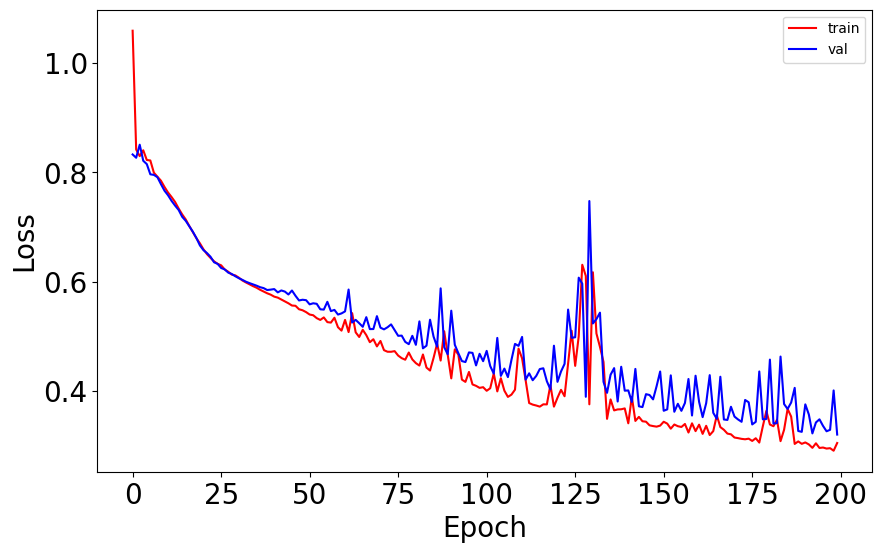

In [30]:
#Graficar el categorical crossentropy
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [24]:
#Predecir con el modelo
Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")

1/1 [==============================] - 0s 27ms/step


In [25]:
Y_pred

array([[4.75139264e-03, 9.72422779e-01, 2.28258707e-02],
       [9.99998689e-01, 1.30460842e-06, 1.56128405e-17],
       [2.15601642e-03, 2.31970865e-02, 9.74646866e-01],
       [4.94578201e-03, 9.69667375e-01, 2.53868364e-02],
       [1.92248041e-03, 9.95873272e-01, 2.20423774e-03],
       [9.99993086e-01, 6.93686025e-06, 4.55629663e-16],
       [1.05601335e-02, 9.89374101e-01, 6.58216595e-05],
       [7.69942068e-03, 2.19779029e-01, 7.72521496e-01],
       [1.04322685e-02, 4.67359543e-01, 5.22208214e-01],
       [5.44678653e-04, 9.99386549e-01, 6.87688807e-05],
       [8.30560084e-03, 2.57331729e-01, 7.34362602e-01],
       [9.99949098e-01, 5.09374622e-05, 1.65822217e-14],
       [9.99999046e-01, 9.00658790e-07, 4.34883135e-18],
       [9.99954343e-01, 4.56879934e-05, 1.21983053e-14],
       [9.99999523e-01, 4.66061351e-07, 5.18549302e-17],
       [2.19131610e-03, 9.94728506e-01, 3.08012357e-03],
       [2.15601642e-03, 2.31970865e-02, 9.74646866e-01],
       [1.10334472e-03, 9.98361

In [26]:
Y_prob

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [27]:
#Hacer ingenería en reversa, para dejar las predicciones en el formato original que teníamos de las "Y"
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [28]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [29]:
#Métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)

#métricas en el train
Y_proba= model.predict(X_train)
Y_pred= np.argmax(Y_proba, axis=1)

accu_train = accuracy_score(y_train, Y_pred)
prec_train = precision_score(y_train, Y_pred,average='weighted')
reca_train = recall_score(y_train, Y_pred,average='weighted')


#métricas en el test
Y_proba= model.predict(X_test)
Y_pred= np.argmax(Y_proba, axis=1)

accu_test = accuracy_score(y_test, Y_pred)
prec_test = precision_score(y_test, Y_pred,average='weighted')
reca_test = recall_score(y_test, Y_pred,average='weighted')
print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

1/1 [==============================] - 0s 32ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.975 	 0.977 	 0.975
  Test 	 0.967 	 0.969 	 0.967
